We need to generate the NERC map using a python library. To do this we will use the following python modules.  

In [19]:
import pathlib
import urllib.request
import geopandas as gpd
import matplotlib.pyplot as plt

The NERC city data is located in the file city_data.csv, the first few lines of which are the following.

In [32]:
!head -n 5 city_data.csv

The first column _region_ is the NERC region name.  The column _name_ is the common name of the city. The column _code_ is the airport code of the city, which is used as the unique identifier when referencing the city.  This can be used to look up the city's location (although in some cases it may not the best location to map).  The _area_ is the name of the NERC load model area. The _climate_ column refers to the DOE climate zone.

To generate a map, we must load the data file(s) needed to download the data from the geopandas libraries.  At this point we are only using a zipcode map. This process is only executed if the file has not already been downloaded.

In [6]:
zipcode_filename = "tl_2017_us_zcta510.zip"
zipcode_url = f"https://www2.census.gov/geo/tiger/TIGER2017/ZCTA5/{zipcode_filename}"
zipcode_file = pathlib.Path(zipcode_filename)

for data_file, url in zip([zipcode_file], [zipcode_url]):
    if not data_file.is_file():
        with urllib.request.urlopen(url) as resp, \
                open(data_file, "wb") as f:

            f.write(resp.read())

Once the file is downloaded, we can load the zipcode map data into memory.

In [7]:
zipcode_gdf = gpd.read_file(f"zip://{zipcode_file}")

Here is a preview of the zipcode data.

In [30]:
zipcode_gdf.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,43451,43451,B5,G6350,S,63411475,157689,+41.3183010,-083.6174935,"POLYGON ((-83.708733 41.327326, -83.708147 41...."
1,43452,43452,B5,G6350,S,121783674,13437380,+41.5157923,-082.9809454,"POLYGON ((-83.086978 41.537796, -83.0825629999..."
2,43456,43456,B5,G6350,S,9389362,999166,+41.6468445,-082.8226641,"(POLYGON ((-82.835577 41.710823, -82.83515 41...."
3,43457,43457,B5,G6350,S,48035540,0,+41.2673266,-083.4274645,"POLYGON ((-83.49650299999999 41.253708, -83.48..."
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,"POLYGON ((-83.222292 41.531025, -83.2222819999..."


Now we can generate a map of the zipcode data.

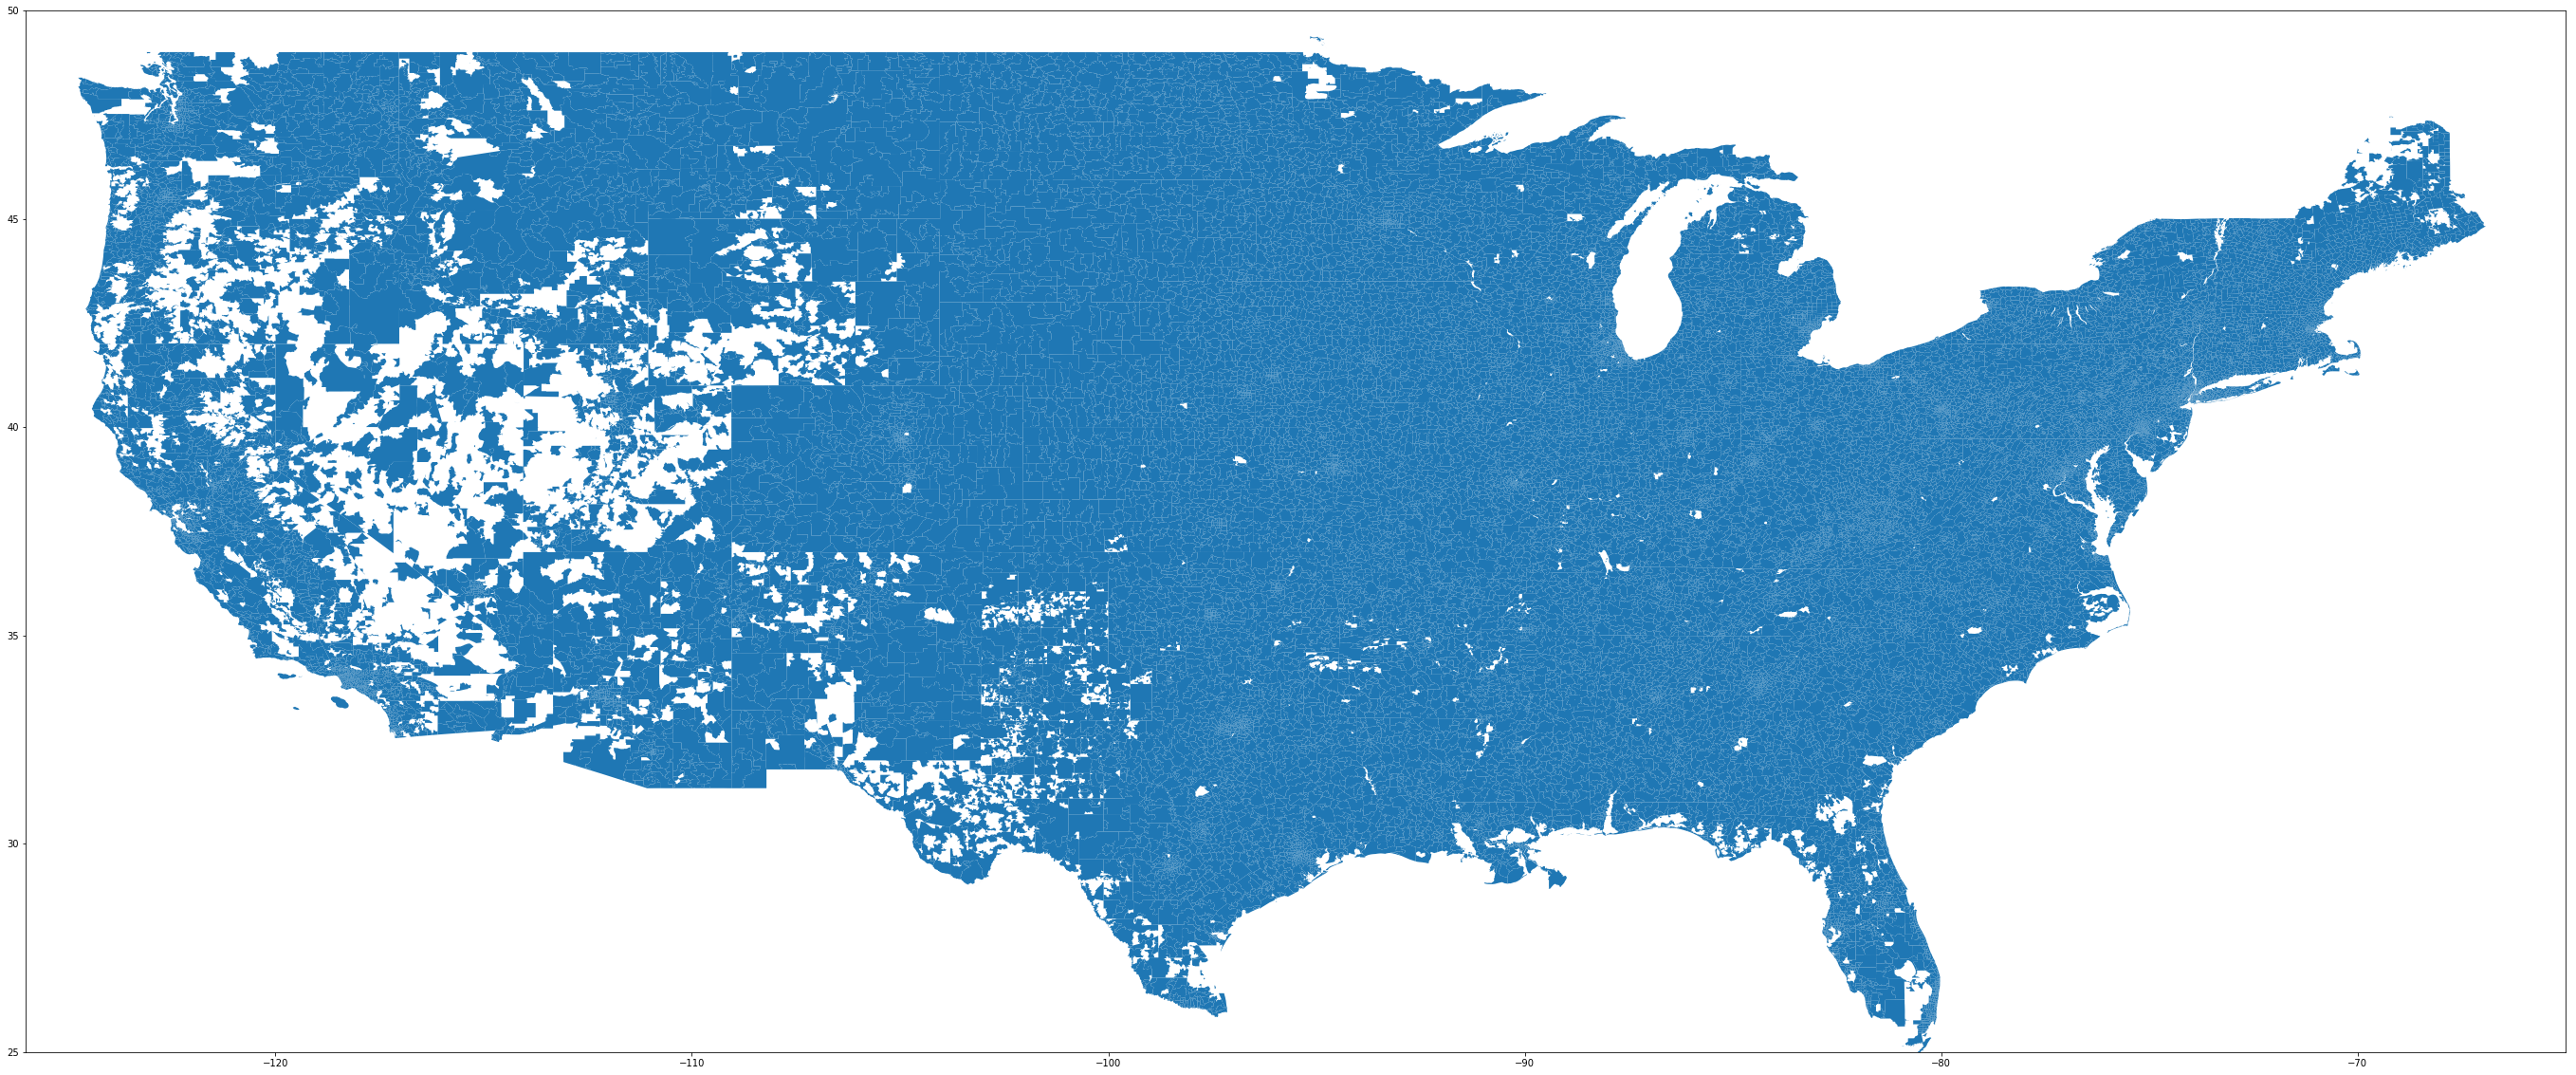

In [28]:
fig = zipcode_gdf.plot(figsize=(48,24))
fig.set_xlim(-126,-65)
fig.set_ylim(25,50)
fig.plot()
plt.savefig('usmap.png')